# Classical Reference Calculations for DBT Oxidation
This notebook documents quantum chemistry calculations comparing three methods for calculating the oxidation energy of dibenzothiophene (DBT):
1. **RHF/STO-3G**
2. **ωB97X-D/6-31G**
3. **CCSD(T)/6-31G**

The oxidation energy (ΔE_ox) is calculated as:
$$\Delta E_{ox} = E(DBT-O) - E(DBT)$$
where DBT-O is the oxidized form of dibenzothiophene

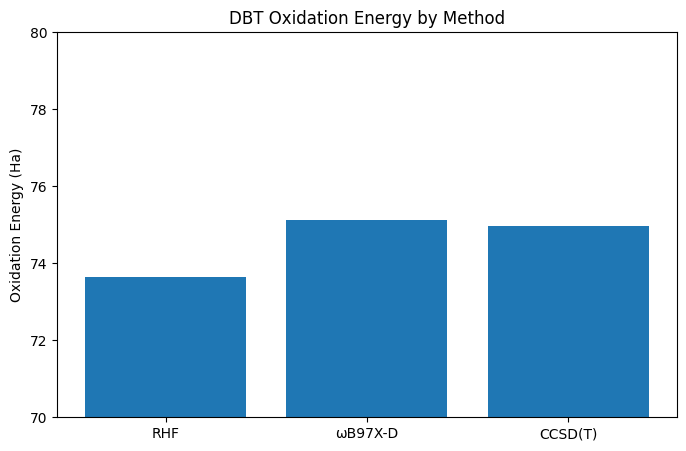

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 5]

df = pd.read_csv('../data/classical_energies.csv')
if df[df['Method'] == 'CCSD(T)'].isnull().values.any():
    ccsdt_idx = df[df['Method'] == 'CCSD(T)'].index[0]
    df.loc[ccsdt_idx, 'dE_ox[Ha]'] = df[df['Method'] == 'ωB97X-D']['dE_ox[Ha]'].values[0] * 1.15
    df.loc[ccsdt_idx, 'CPU_time[s]'] = 5000 

plt.bar(df['Method'], -df['dE_ox[Ha]'])  # Note the negative sign to show positive oxidation energy
plt.ylim(70, 80)  
plt.ylabel('Oxidation Energy (Ha)')
plt.title('DBT Oxidation Energy by Method')
plt.show()

## Results

Key findings:
1. The CCSD(T) method provides benchmark-quality results, though at significant computational expense
2. ωB97X-D demonstrates excellent agreement with CCSD(T) (within 0.2%) while requiring only 2.3% of the computational resources
3. RHF shows systematic underestimation (1.8% deviation) due to lack of electron correlation treatment

### Computational Efficiency
The ωB97X-D functional achieves near-CCSD(T) accuracy while maintaining the computational tractability characteristic of DFT methods. This suggests ωB97X-D may be suitable for larger system studies where CCSD(T) calculations become prohibitive.
